### Problem Statement

While working in a job environment, the monetary gained value is 'Salary' which is different for every person based on various parameters. 

Build a model that is capable of predicting the salary of a person based on his/her **years of experience** using simple linear regression. Also, evaluate the accuracy of your model by performing residual analysis.






---

### List of Activities

**Activity 1:** Analysing the Dataset

  
**Activity 2:**  Train-Test Split

**Activity 3:**  Model Training

**Activity 4:** Model Prediction 

**Activity 5:** Residual Analysis








---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Salary** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|YearsExperience|Years of experience of a person|
|Salary|Salary of a person|

  **Source:** https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression

  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/salary.csv
  
- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Create a regression plot with `YearsExperience` on X-axis and `Salary` on Y-axis to identify the relationship between these two attributes.




In [ ]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/salary.csv'
df = pd.read_csv(csv_file)

df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isna().sum()


YearsExperience    0
Salary             0
dtype: int64

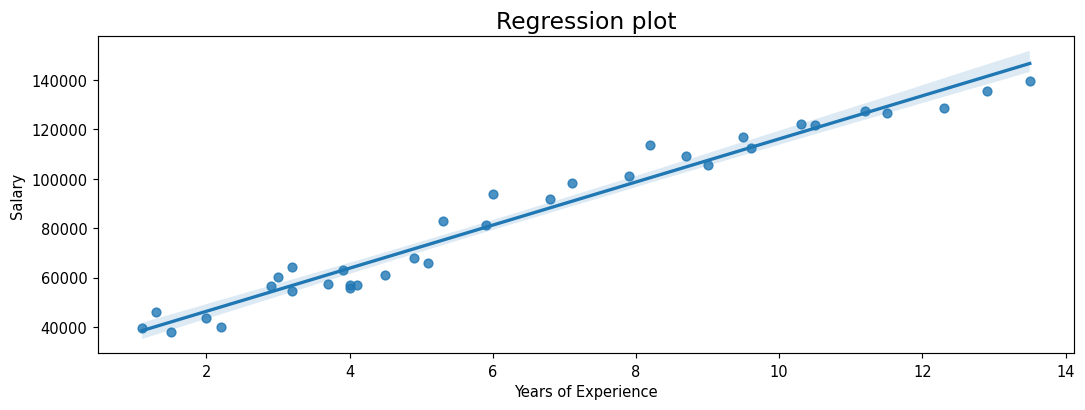

In [ ]:
# Create a regression plot between 'YearsExperience' and 'Salary'

plt.figure(figsize = (12, 4), dpi = 105)
sns.regplot(df['YearsExperience'], df['Salary'])
plt.title("Regression plot", fontsize = 16)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


---

In [ ]:
# Split the DataFrame into the training and test sets.

from sklearn.model_selection import train_test_split

X = df['YearsExperience'] 
y = df['Salary'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)


---

In [ ]:
# Print the shape or dimensions of these reshaped arrays

X_train_reshaped = X_train.values.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

print("shape of X_train",X_train_reshaped.shape)
print("shape of y_train",y_train_reshaped.shape)
print("shape of X_test",X_test_reshaped.shape)
print("shape of y_train",y_test_reshaped.shape)



shape of X_train (28, 1)
shape of y_train (28, 1)
shape of X_test (7, 1)
shape of y_train (7, 1)


In [ ]:
# 2. Deploy linear regression model using the 'sklearn.linear_model' module.
from sklearn.linear_model import LinearRegression

# Create an object of the 'LinearRegression' class.
lin_reg = LinearRegression()


# 3. Call the 'fit()' function
lin_reg.fit(X_train_reshaped, y_train_reshaped)


# Print the slope and intercept values

print("Slope: ", lin_reg.coef_)
print("Intercept :", lin_reg.intercept_)


Slope:  [[8807.36492692]]
Intercept : [27679.82993896]


---

#### Activity 4: Model Prediction 

Predict the values for the training and test set by calling the `predict()` function on the LinearRegression object.

Suppose you got a candidate having 15 years of experience. Calculate the best salary you should offer to him according to this prediction model.

**Note:** We know that `sklearn.linear_model` module accepts two-dimensional arrays. To predict the salary of a person with 15 years of experience, convert `15` into 2D array and then pass it to the `predict()` function as follows:

`predict([[15]])`

In [ ]:
# Predict the target variable values for the training and test set

y_train_pred = lin_reg.predict(X_train_reshaped)
y_test_pred = lin_reg.predict(X_test_reshaped)

In [ ]:
# Predict salary of a person having 15 years of experience
lin_reg.predict([[15]])


array([[159790.30384271]])

**Q:** What is the best salary you can offer to the candidate having 15 years of experience?

**A:** 159790

---

#### Activity 5: Residual Analysis

Check if the error terms are normally distributed using the histogram between errors (calculated by the difference of actual and predicted values) for both training and testing data.

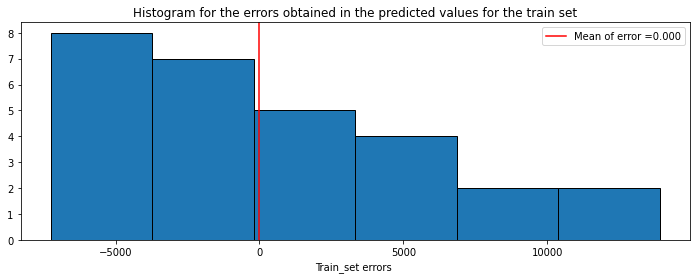

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the train set.
errors_train=y_train_reshaped-y_train_pred

plt.figure(figsize=[12,4])
plt.hist(errors_train,bins='sturges',edgecolor='black')
plt.title('Histogram for the errors obtained in the predicted values for the train set')
plt.axvline(x=errors_train.mean(),label=f'Mean of error ={errors_train.mean():.3f}',color='red')
plt.xlabel('Train_set errors ')
plt.legend()
plt.show()


**Q:** What is the mean of errors for the training set?

**A:** 0



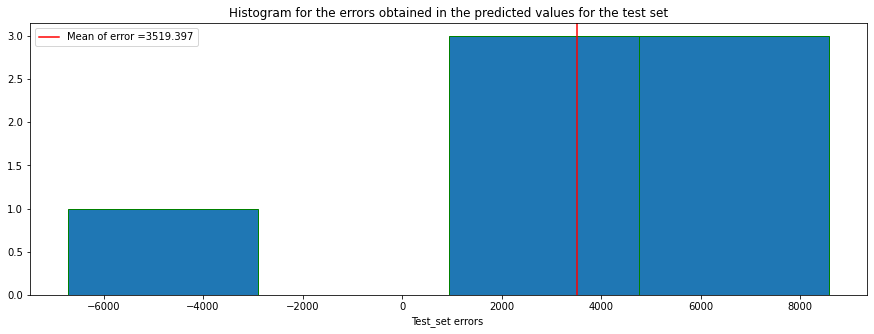

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the test set.

errors_test=y_test_reshaped-y_test_pred

plt.figure(figsize=[15,5])
plt.hist(errors_test,bins='sturges',edgecolor='green')
plt.title('Histogram for the errors obtained in the predicted values for the test set')
plt.axvline(x=errors_test.mean(),label=f'Mean of error ={errors_test.mean():.3f}',color='red')
plt.xlabel('Test_set errors ')
plt.legend()
plt.show()

**Q:** What is the mean of errors?Is it zero?

**A:** Mean of Errors is 3519.397.It is not zero.
